In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

plt.style.use("ggplot")

%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = (12, 6)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/tcs-stock.csv")
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,31-May-2018,3514.10,1734.0,1759.05,1726.10,1748.85,1741.05,1742.44,5049371,8.798250e+09,207998,3447026,68.27
1,TCS,EQ,01-Jun-2018,1741.05,1754.0,1757.50,1716.30,1732.00,1732.45,1742.29,1603856,2.794386e+09,74272,924751,57.66
2,TCS,EQ,04-Jun-2018,1732.45,1745.0,1749.00,1712.60,1742.00,1744.25,1730.25,1681483,2.909394e+09,96686,928452,55.22
3,TCS,EQ,05-Jun-2018,1744.25,1744.0,1751.90,1711.15,1723.00,1721.60,1728.88,2449568,4.235001e+09,133067,1492228,60.92
4,TCS,EQ,06-Jun-2018,1721.60,1723.0,1734.90,1715.20,1725.00,1725.75,1725.85,2236512,3.859875e+09,73770,1573892,70.37


Check whether you have duplicate data on by date. It looks like 11/2/2019, 18/2/2019, 25/2/2019 etc. have duplicate data. Not sure why there are duplicates by date. It could be ammendment to the data.

In [ ]:
df[df["Date"].duplicated(keep = False)]

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
173,TCS,BL,11-Feb-2019,2604.20,2061.40,2061.40,2061.40,2061.40,2061.40,2061.40,376308,7.757213e+08,1,0,0.00
174,TCS,EQ,11-Feb-2019,2061.40,2060.00,2096.00,2048.90,2065.60,2065.90,2077.11,1778730,3.694622e+09,83603,901516,50.68
179,TCS,BL,18-Feb-2019,2061.40,2029.70,2029.70,2029.70,2029.70,2029.70,2029.70,2474600,5.022696e+09,1,0,0.00
180,TCS,EQ,18-Feb-2019,2029.70,2037.60,2041.95,1962.65,1969.60,1970.30,1988.87,2942184,5.851634e+09,100585,1668905,56.72
185,TCS,BL,25-Feb-2019,2029.70,1925.65,1925.65,1925.65,1925.65,1925.65,1925.65,1057509,2.036392e+09,2,0,0.00
186,TCS,EQ,25-Feb-2019,1925.65,1932.50,1990.00,1930.50,1987.00,1985.15,1961.61,2934880,5.757095e+09,140541,1341508,45.71
203,TCS,BL,22-Mar-2019,1925.65,2015.05,2015.05,2015.05,2015.05,2015.05,2015.05,264913,5.338129e+08,1,264913,100.00
204,TCS,EQ,22-Mar-2019,2015.05,2015.00,2016.00,1983.30,2010.00,2005.65,1998.96,3148149,6.293032e+09,155770,1787595,56.78


Drop the duplicate from the dataset.

In [ ]:
df = df[~df["Date"].duplicated()]

Convert the dataset into time series data by undating the index to time series index.

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%Y")
df.set_index("Date", inplace=True)  # Set the "Date" column as the index
df.head()


<ipython-input-11-339297a63880>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%Y")


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2018-05-31,TCS,EQ,3514.10,1734.0,1759.05,1726.10,1748.85,1741.05,1742.44,5049371,8.798250e+09,207998,3447026,68.27
2018-06-01,TCS,EQ,1741.05,1754.0,1757.50,1716.30,1732.00,1732.45,1742.29,1603856,2.794386e+09,74272,924751,57.66
2018-06-04,TCS,EQ,1732.45,1745.0,1749.00,1712.60,1742.00,1744.25,1730.25,1681483,2.909394e+09,96686,928452,55.22
2018-06-05,TCS,EQ,1744.25,1744.0,1751.90,1711.15,1723.00,1721.60,1728.88,2449568,4.235001e+09,133067,1492228,60.92
2018-06-06,TCS,EQ,1721.60,1723.0,1734.90,1715.20,1725.00,1725.75,1725.85,2236512,3.859875e+09,73770,1573892,70.37


In [ ]:
df.index

DatetimeIndex(['2018-05-31', '2018-06-01', '2018-06-04', '2018-06-05',
               '2018-06-06', '2018-06-07', '2018-06-08', '2018-06-11',
               '2018-06-12', '2018-06-13',
               ...
               '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22',
               '2019-05-23', '2019-05-24', '2019-05-27', '2019-05-28',
               '2019-05-29', '2019-05-30'],
              dtype='datetime64[ns]', name='Date', length=246, freq=None)

<Axes: xlabel='Date'>

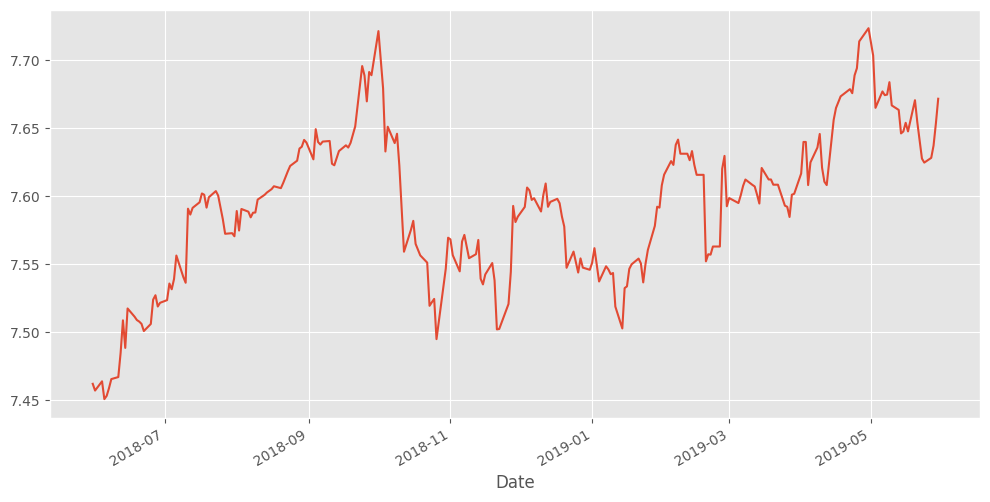

In [ ]:
y = np.log(df["Close Price"])
y.plot()

In [ ]:
y.index

DatetimeIndex(['2018-05-31', '2018-06-01', '2018-06-04', '2018-06-05',
               '2018-06-06', '2018-06-07', '2018-06-08', '2018-06-11',
               '2018-06-12', '2018-06-13',
               ...
               '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22',
               '2019-05-23', '2019-05-24', '2019-05-27', '2019-05-28',
               '2019-05-29', '2019-05-30'],
              dtype='datetime64[ns]', name='Date', length=246, freq=None)

Let's see if there are gaps in the data in terms of date range. Trading does not happen on weekends or national holidays. So there is no data on those days.

In [ ]:
list(y.index[:10])

[Timestamp('2018-05-31 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-06-04 00:00:00'),
 Timestamp('2018-06-05 00:00:00'),
 Timestamp('2018-06-06 00:00:00'),
 Timestamp('2018-06-07 00:00:00'),
 Timestamp('2018-06-08 00:00:00'),
 Timestamp('2018-06-11 00:00:00'),
 Timestamp('2018-06-12 00:00:00'),
 Timestamp('2018-06-13 00:00:00')]

In [ ]:
y.asfreq("D")[:15]

,Close Price
Date,
2018-05-31,7.462244
2018-06-01,7.457292
2018-06-02,NaN
2018-06-03,NaN
2018-06-04,7.464080
2018-06-05,7.451009
2018-06-06,7.453417
2018-06-07,7.459080
2018-06-08,7.465713


Let's impute the missing data by forward fill using asfreq method.

In [ ]:
y.asfreq("D", method="ffill")[:15]

,Close Price
Date,
2018-05-31,7.462244
2018-06-01,7.457292
2018-06-02,7.457292
2018-06-03,7.457292
2018-06-04,7.464080
2018-06-05,7.451009
2018-06-06,7.453417
2018-06-07,7.459080
2018-06-08,7.465713


For legitimate gaps, we can also set frequency to business days ("B")

In [ ]:
y = y.asfreq("B")
y.index

DatetimeIndex(['2018-05-31', '2018-06-01', '2018-06-04', '2018-06-05',
               '2018-06-06', '2018-06-07', '2018-06-08', '2018-06-11',
               '2018-06-12', '2018-06-13',
               ...
               '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22',
               '2019-05-23', '2019-05-24', '2019-05-27', '2019-05-28',
               '2019-05-29', '2019-05-30'],
              dtype='datetime64[ns]', name='Date', length=261, freq='B')

Calculate quarterly high, low etc.

In [ ]:
pd.DataFrame(dict(low=y.resample("Q").min(),
                  high=y.resample("Q").max(),
                  first = y.resample("Q").first(),
                  last = y.resample("Q").last(),
                  median = y.resample("Q").median(),
                  mean = y.resample("Q").mean()
                 ))

<ipython-input-19-775b91a41889>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  pd.DataFrame(dict(low=y.resample("Q").min(),
<ipython-input-19-775b91a41889>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  high=y.resample("Q").max(),
<ipython-input-19-775b91a41889>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  first = y.resample("Q").first(),
<ipython-input-19-775b91a41889>:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  last = y.resample("Q").last(),
<ipython-input-19-775b91a41889>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  median = y.resample("Q").median(),
<ipython-input-19-775b91a41889>:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  mean = y.res

,low,high,first,last,median,mean
Date,,,,,,
2018-06-30,7.451009,7.527256,7.462244,7.521724,7.503576,7.491539
2018-09-30,7.523670,7.695508,7.523670,7.688776,7.602676,7.607829
2018-12-31,7.495042,7.721149,7.721149,7.545945,7.567837,7.572861
2019-03-31,7.502876,7.641516,7.551082,7.601727,7.593789,7.585512
2019-06-30,7.608126,7.723275,7.616604,7.671501,7.654088,7.655684


Calculate rolling mean, exponentially weighted mean

In [ ]:
period = 3
y_rolling = pd.DataFrame(dict(actual = y,
                              rolling_mean = y.rolling(period).mean(),
                              ewm = y.ewm(span = period).mean()
                             ))
y_rolling.head(10)

,actual,rolling_mean,ewm
Date,,,
2018-05-31,7.462244,NaN,7.462244
2018-06-01,7.457292,NaN,7.458942
2018-06-04,7.464080,7.461205,7.461878
2018-06-05,7.451009,7.457460,7.456081
2018-06-06,7.453417,7.456169,7.454706
2018-06-07,7.459080,7.454502,7.456928
2018-06-08,7.465713,7.459403,7.461355
2018-06-11,7.467200,7.463997,7.464289
2018-06-12,7.484930,7.472614,7.474630


In [ ]:
rolling_dropped = y_rolling.dropna()
print("rmse over rolling mean: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped.rolling_mean) ** 0.5)
print("rmse over ewma: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped["ewm"]) ** 0.5)

rmse over rolling mean:  0.01122680111697439
rmse over ewma:  0.008422829060485497


By visual inspection, we see the time series is not stationary. Let we will see a more formal way of testing using Dickey Fullter Test.

<Axes: xlabel='Date'>

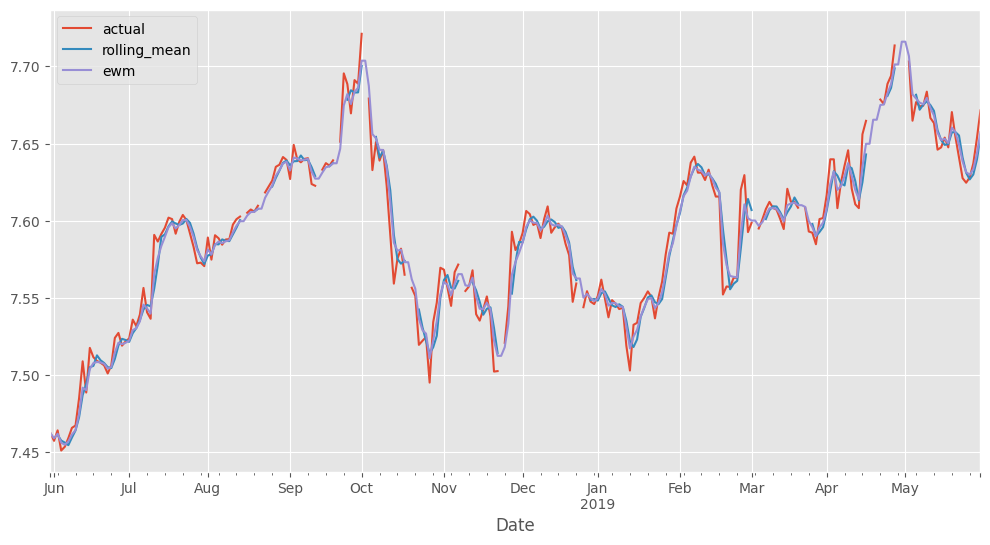

In [ ]:
y_rolling.plot()

Formal of way of test for stationarity. Since the p-value of Augmented Dickey Fullter test is > 0.05, we can say that there is not sufficient proof that the time series is stationary. Loosely speaking, it is non-stationary. We need further transformation to make data stationary. Populary method for making data stationary will be to take "difference". Taking difference by lag one, we see the p-val for Dickey Fuller test is < 0.05. So we conclude, diff 1 has made the data stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.645513
p-value: 0.083951


In [ ]:
diff = pd.DataFrame({"actual": y, "diff1": y.diff(3)}).head(10)
diff["diff2"] = diff.diff1.diff(1)
diff

,actual,diff1,diff2
Date,,,
2018-05-31,7.462244,NaN,NaN
2018-06-01,7.457292,NaN,NaN
2018-06-04,7.464080,NaN,NaN
2018-06-05,7.451009,-0.011234,NaN
2018-06-06,7.453417,-0.003875,0.007359
2018-06-07,7.459080,-0.005000,-0.001125
2018-06-08,7.465713,0.014703,0.019703
2018-06-11,7.467200,0.013783,-0.000921
2018-06-12,7.484930,0.025851,0.012068


In [ ]:
result = adfuller(y.diff(periods=1).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -16.354529
p-value: 0.000000


<Axes: xlabel='Date'>

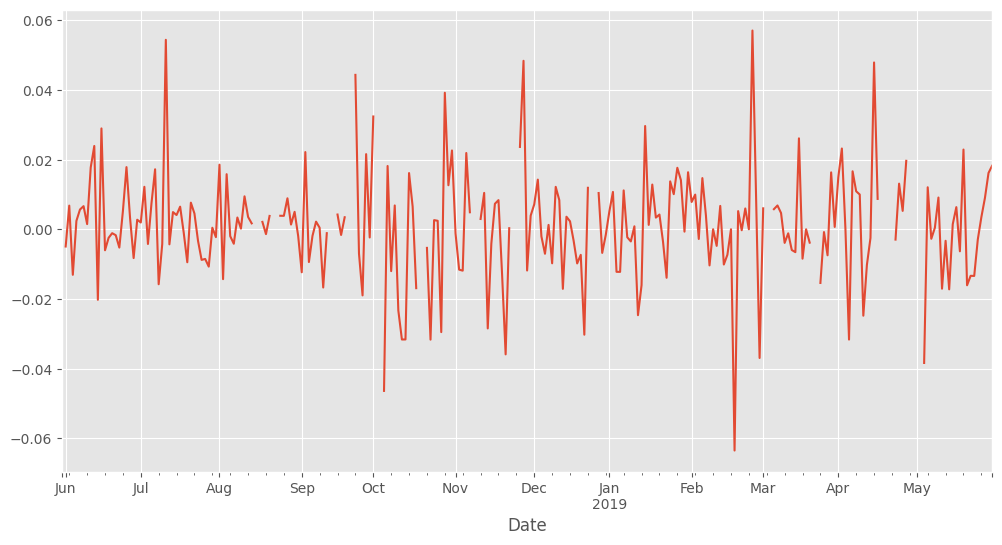

In [ ]:
y.diff(periods=1).plot()

Use pandas's auto correlation plot. Here is a nice explanation of the [autocorrelation plot](https://stats.stackexchange.com/questions/357300/what-does-pandas-autocorrelation-graph-show)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

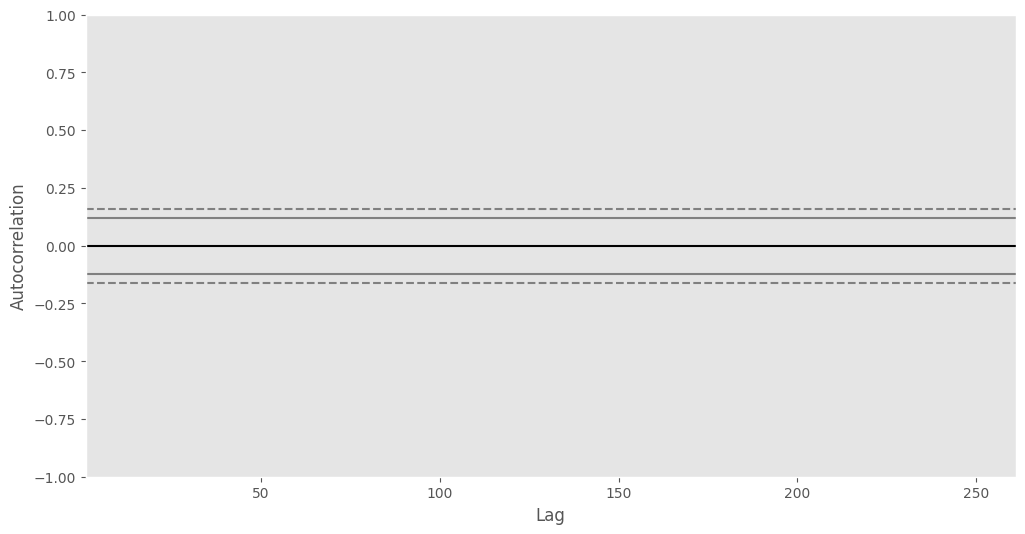

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)

In [ ]:
y = y.dropna()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(y, order=(5,1,0)) # p, d, q
model_fit = model.fit(disp=0)
#print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

y = df["Average Price"]
model = ARIMA(y, order=(5, 1, 0))
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(df.columns)

Index(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Average Price   No. Observations:                  246
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1143.755
Date:                Mon, 18 Nov 2024   AIC                           2299.511
Time:                        19:25:36   BIC                           2320.518
Sample:                             0   HQIC                          2307.970
                                - 246                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1995      0.067      2.996      0.003       0.069       0.330
ar.L2         -0.1368      0.063     -2.177      0.029      -0.260      -0.014
ar.L3          0.0396      0.075      0.529      0.597      -0.107       0.186
ar.L4         -0.0527      0.072     -0.730      0.465      -0.194       0.089
ar.L5          0.1140      0.044      2.565      0.010       0.027       0.201
sigma2       664.0797     41.737     15.911      0.000     582.277     745.882
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                65.10
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.85   Skew:                            -0.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

First 10 errors: [ 1.74244000e+03 -3.60604806e-01 -1.18635062e+01  9.15156307e-01
 -4.28944007e+00  1.27157280e+01  7.18845685e+00  4.92858008e+00
  2.11432609e+01  4.15737684e+01]


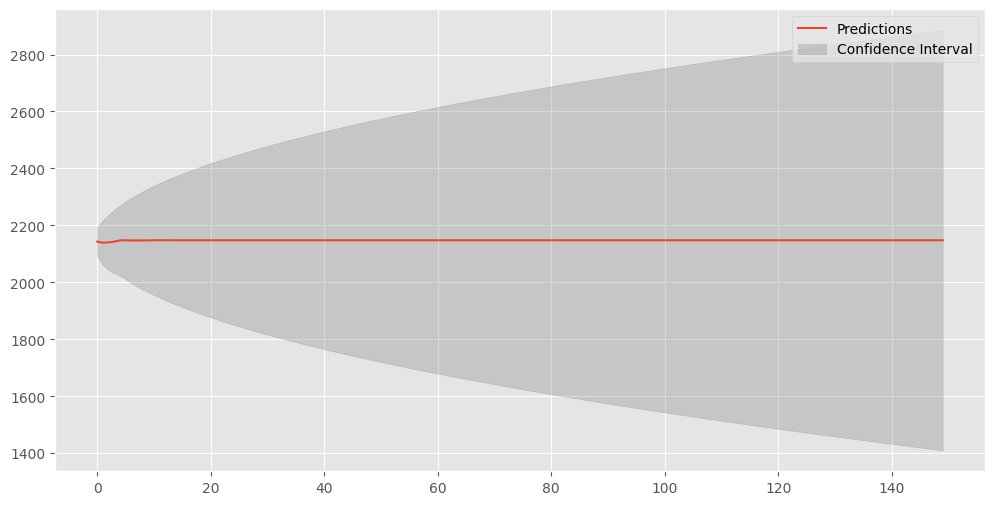

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(y.values, order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=150)
predictions = forecast.predicted_mean
conf_interval = forecast.conf_int()

fitted_values = model_fit.fittedvalues
error = y.values[len(y.values) - len(fitted_values):] - fitted_values

# Display the first 10 errors
print("First 10 errors:", error[:10])

# Plot the predictions and confidence intervals
plt.plot(predictions, label='Predictions')
plt.fill_between(range(len(predictions)), conf_interval[:, 0], conf_interval[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.show()


In [ ]:
predictions[:10]

array([2143.03425924, 2139.17681436, 2140.38552972, 2143.18367187,
       2147.18069249, 2147.89385555, 2147.09711804, 2146.9892659 ,
       2147.21318837, 2147.65894257])

In [ ]:
print(error)

[ 1.74244000e+03 -3.60604806e-01 -1.18635062e+01  9.15156307e-01
 -4.28944007e+00  1.27157280e+01  7.18845685e+00  4.92858008e+00
  2.11432609e+01  4.15737684e+01 -2.97038533e+01  3.67321823e+01
  7.64090327e+00 -9.81613347e+00 -3.95743393e+00 -3.76183822e+00
 -1.32677637e+01  6.30254639e+00  2.32998125e+01  2.42946195e+01
 -2.67177979e+01  1.44964797e+01 -4.17705569e+00  2.02849135e+01
 -1.71375227e+01  1.81844279e+01  2.86807660e+01 -2.33661232e+01
 -1.08539487e+00  6.90213517e+01  6.96125868e+00  1.46416340e+01
  1.68808263e+00  1.08448386e+01 -2.00672811e+00 -1.87779940e+01
  1.18505305e+01  7.85903916e+00 -8.14954792e+00 -1.81013638e+01
 -5.83423403e+00 -2.07951949e+01 -4.67298659e+00 -8.72459018e+00
  4.10706330e+01 -2.06491652e+01  2.31104917e+01  2.15308185e+00
 -1.02949385e+01  5.46585041e-01  4.40056345e+00  9.93385788e+00
  9.12362742e+00  1.28651133e+01 -3.04827094e+00  5.94628069e+00
 -3.65002787e+00  4.14141120e+00  1.27758838e+01  9.00853018e+00
  9.10735694e+00  1.29986

In [ ]:
error[:10]

array([ 1.74244000e+03, -3.60604806e-01, -1.18635062e+01,  9.15156307e-01,
       -4.28944007e+00,  1.27157280e+01,  7.18845685e+00,  4.92858008e+00,
        2.11432609e+01,  4.15737684e+01])

In [ ]:
conf_interval[:10]

array([[2092.52649006, 2193.54202842],
       [2060.3000682 , 2218.05356052],
       [2043.83142759, 2236.93963184],
       [2031.89781979, 2254.46952394],
       [2023.62878672, 2270.73259825],
       [2011.22747651, 2284.56023459],
       [1997.44145397, 2296.75278212],
       [1985.66366326, 2308.31486853],
       [1975.09876974, 2319.32760699],
       [1965.48814945, 2329.82973568]])

In [ ]:
model.endog

array([[1742.44],
       [1742.29],
       [1730.25],
       [1728.88],
       [1725.85],
       [1738.  ],
       [1748.59],
       [1752.55],
       [1773.52],
       [1818.17],
       [1795.49],
       [1823.42],
       [1840.85],
       [1829.83],
       [1828.68],
       [1822.83],
       [1810.38],
       [1817.52],
       [1842.52],
       [1870.51],
       [1846.23],
       [1851.25],
       [1852.  ],
       [1872.16],
       [1863.61],
       [1874.33],
       [1907.65],
       [1888.15],
       [1881.79],
       [1951.99],
       [1972.52],
       [1986.23],
       [1988.74],
       [1994.6 ],
       [2000.88],
       [1984.27],
       [1993.61],
       [2005.83],
       [1998.52],
       [1979.25],
       [1968.67],
       [1948.53],
       [1942.3 ],
       [1934.85],
       [1972.85],
       [1960.41],
       [1973.58],
       [1981.25],
       [1967.34],
       [1969.57],
       [1974.51],
       [1985.67],
       [1998.04],
       [2010.34],
       [2008.49],
       [20

In [ ]:
(predictions + 1.96 * (conf_interval[:, 1] - predictions))[:10]


array([2242.02948684, 2293.77523683, 2329.63156988, 2361.30394193,
       2389.34242779, 2415.75995847, 2440.42221963, 2463.18744706,
       2484.55744887, 2504.71369707])

In [ ]:
(predictions - 1.96 * (predictions - conf_interval[:, 0]))[:10]


array([2044.03903165, 1984.57839189, 1951.13948955, 1925.0634018 ,
       1905.01895719, 1880.02775263, 1853.77201646, 1830.79108473,
       1809.86892786, 1790.60418806])

predicted=2088.401, actual=2072.460
predicted=2074.737, actual=2061.400
predicted=2062.674, actual=2042.960
predicted=2045.782, actual=2064.320
predicted=2071.744, actual=2050.830
predicted=2043.810, actual=2031.880
predicted=2029.288, actual=2029.700
predicted=2026.337, actual=1930.070
predicted=1921.055, actual=1908.200
predicted=1909.098, actual=1922.840
predicted=1915.048, actual=1920.720
predicted=1919.060, actual=1925.650
predicted=1905.468, actual=2022.120
predicted=2032.411, actual=2050.250
predicted=2049.305, actual=2009.420
predicted=2007.391, actual=1993.730
predicted=1995.454, actual=1987.110
predicted=1996.374, actual=2001.300
predicted=2008.448, actual=2014.400
predicted=2009.569, actual=2023.030
predicted=2022.192, actual=2017.100
predicted=2014.670, actual=2015.600
predicted=2017.965, actual=2001.120
predicted=1999.883, actual=1991.280
predicted=1992.494, actual=2040.010
predicted=2047.273, actual=2033.020
predicted=2026.196, actual=2010.710
predicted=2009.986, actual=2

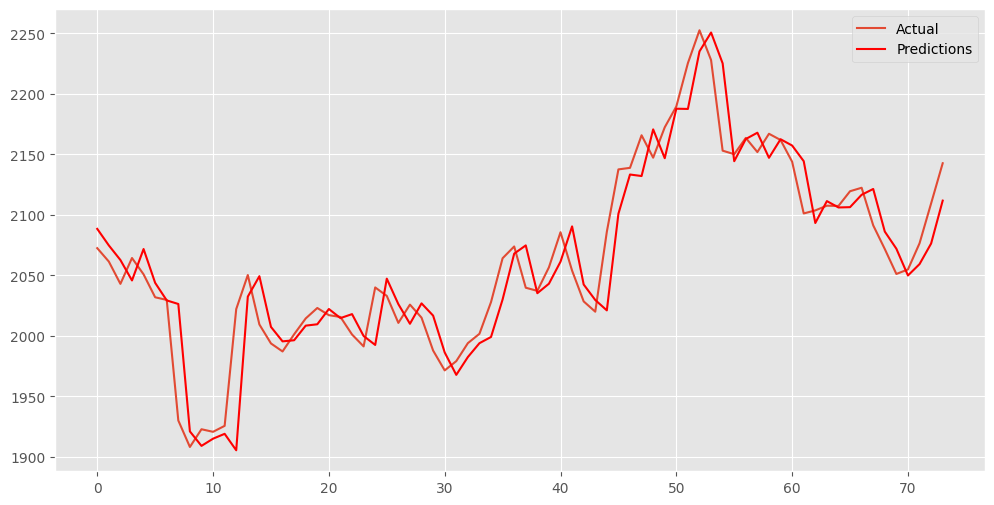

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

x = y.values
train_size = int(len(x) * 0.7)
train, test = x[0:train_size], x[train_size:]
history = list(train)
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted={yhat:.3f}, actual={obs:.3f}')

# Calculate RMSE
error = mean_squared_error(test, predictions)
print(f'Test RMSE: {np.sqrt(error):.3f}')

# Plot the actual values and predictions
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predictions')
plt.legend()
plt.show()


In [ ]:
result = pd.DataFrame(y)[train_size:]
result.columns = ["actual"]
result["prediction"] = predictions
result

,actual,prediction
Date,,
2019-02-08,2072.46,2088.401213
2019-02-11,2061.40,2074.737107
2019-02-12,2042.96,2062.673667
2019-02-13,2064.32,2045.782477
2019-02-14,2050.83,2071.743978
...,...,...
2019-05-24,2051.14,2071.988053
2019-05-27,2054.87,2049.875218
2019-05-28,2076.46,2059.285276


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


data = np.array([i for i in range(1, 101)])

n_input = 10
n_output = 1
generator = TimeseriesGenerator(data, data, length=n_input, batch_size=1)


for i, (x, y) in enumerate(generator):
    print(f"Input: {x}, Output: {y}")
    if i == 0:
        break


Input: [[ 1  2  3  4  5  6  7  8  9 10]], Output: [11]


In [ ]:
y_b = np.log(df["Close Price"])
y_b = y_b.asfreq("B").dropna()/10.0
print("%s" % y_b[:10])

Date
2018-05-31    0.746224
2018-06-01    0.745729
2018-06-04    0.746408
2018-06-05    0.745101
2018-06-06    0.745342
2018-06-07    0.745908
2018-06-08    0.746571
2018-06-11    0.746720
2018-06-12    0.748493
2018-06-13    0.750884
Name: Close Price, dtype: float64


In [ ]:
n_input = 5
train_size = int(0.7 * len(y_b))
y_b_train = y_b[:train_size]
y_b_test = y_b[train_size:]
generator_train = TimeseriesGenerator(y_b_train, y_b_train, length=n_input, batch_size=1, )
generator_test = TimeseriesGenerator(y_b_test, y_b_test, length=n_input, batch_size=1)
print('Samples: %d' % len(generator_train))
for i in range(3):
    x, y = generator_train[i]
    print('%s => %s' % (x, y))

Samples: 167
[[0.74622437 0.74572919 0.74640799 0.74510094 0.7453417 ]] => [0.74590796]
[[0.74572919 0.74640799 0.74510094 0.7453417  0.74590796]] => [0.74657125]
[[0.74640799 0.74510094 0.7453417  0.74590796 0.74657125]] => [0.74671996]


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/sequence.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


tf.random.set_seed(1)
np.random.seed(1)

# Example data
data = np.array([i for i in range(1, 101)])  # 100 data points
n_input = 10
n_output = 1

# Create a TimeseriesGenerator for training data
generator_train = TimeseriesGenerator(data, data, length=n_input, batch_size=1)


model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(n_input,)),  # Ensure n_input matches the data
    keras.layers.Dense(1, activation=None, kernel_initializer=keras.initializers.HeUniform(seed=1))
])

# Compile the model
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1))
model.summary()


model.fit(generator_train, steps_per_epoch=1, epochs=500, verbose=0)


y_b_test_pred = model.predict(generator_train)


layer = model.layers[0]
print(layer.get_weights())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32), array([nan], dtype=float32)]


In [ ]:
y_b_test_pred.shape, y_b_test.shape

((90, 1), (74,))

In [ ]:
print(f"Length of y_b_test: {len(y_b_test)}")
print(f"Length of y_b_test_pred: {len(y_b_test_pred)}")
print(f"n_input: {n_input}")

print(f"Expected start index in y_b_test: {n_input}")
print(f"Expected end index in y_b_test: {n_input + len(y_b_test_pred)}")

adjusted_start = n_input
adjusted_end = adjusted_start + len(y_b_test_pred)

if adjusted_end > len(y_b_test):
    print(f"Adjusted end index {adjusted_end} exceeds the length of y_b_test {len(y_b_test)}!")
    adjusted_end = len(y_b_test)
    print(f"Updated end index: {adjusted_end}")

y_b_test_adjusted = y_b_test[adjusted_start:adjusted_end]

print(f"Length of y_b_test_adjusted: {len(y_b_test_adjusted)}")
print(f"Length of y_b_test_pred: {len(y_b_test_pred)}")

# Assert lengths match (add conditional fallback if needed)
if len(y_b_test_adjusted) != len(y_b_test_pred):
    print("Mismatch persists! Adjusting lengths further is necessary.")
else:
    print("Lengths match!")

if len(y_b_test_adjusted) == len(y_b_test_pred):
    rmse = metrics.mean_squared_error(y_b_test_adjusted * 10.0, y_b_test_pred * 10.0) ** 0.5
    print("RMSE:", rmse)
else:
    print("Cannot compute RMSE due to persistent length mismatch.")


Length of y_b_test: 74
Length of y_b_test_pred: 90
n_input: 10
Expected start index in y_b_test: 10
Expected end index in y_b_test: 100
Adjusted end index 100 exceeds the length of y_b_test 74!
Updated end index: 74
Length of y_b_test_adjusted: 64
Length of y_b_test_pred: 90
Mismatch persists! Adjusting lengths further is necessary.
Cannot compute RMSE due to persistent length mismatch.


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error


n_input = 5
y_b_test = np.random.rand(100)
y_b_test_pred = np.random.rand(95)


adjusted_start = n_input
adjusted_end = len(y_b_test)
y_b_test_adjusted = y_b_test[adjusted_start:adjusted_end]


y_b_test_pred_trimmed = y_b_test_pred[:len(y_b_test_adjusted)]


valid_indices = ~np.isnan(y_b_test_adjusted) & ~np.isnan(y_b_test_pred_trimmed)
y_b_test_adjusted = y_b_test_adjusted[valid_indices]
y_b_test_pred_trimmed = y_b_test_pred_trimmed[valid_indices]


print(f"Length of y_b_test_adjusted: {len(y_b_test_adjusted)}")
print(f"Length of y_b_test_pred_trimmed: {len(y_b_test_pred_trimmed)}")


assert len(y_b_test_adjusted) == len(y_b_test_pred_trimmed), "Final lengths still do not match!"

# Compute the RMSE
rmse = mean_squared_error(y_b_test_adjusted * 10.0, y_b_test_pred_trimmed * 10.0, squared=False)
print("RMSE:", rmse)


Length of y_b_test_adjusted: 95
Length of y_b_test_pred_trimmed: 95
RMSE: 4.0819242939706175


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
y_b = y_b.values
y_b = y_b.reshape((len(y_b), 1))

train_size = int(0.7 * len(y_b))
y_b_train = y_b[:train_size]
y_b_test = y_b[train_size:]

n_input = 5

generator_train = TimeseriesGenerator(y_b_train, y_b_train, length=n_input, batch_size=1, )
generator_test = TimeseriesGenerator(y_b_test, y_b_test, length=n_input, batch_size=1)
print('Samples: %d' % len(generator_train))
for i in range(3):
    x, y = generator_train[i]
    print('%s => %s' % (x, y))


Samples: 167
[[[0.74622437]
  [0.74572919]
  [0.74640799]
  [0.74510094]
  [0.7453417 ]]] => [[0.74590796]]
[[[0.74572919]
  [0.74640799]
  [0.74510094]
  [0.7453417 ]
  [0.74590796]]] => [[0.74657125]]
[[[0.74640799]
  [0.74510094]
  [0.7453417 ]
  [0.74590796]
  [0.74657125]]] => [[0.74671996]]


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input = 10
batch_size = 32
data = np.sin(np.linspace(0, 100, 1000))

train_size = int(len(data) * 0.7)
train_data = data[:train_size]
test_data = data[train_size:]

# Create TimeseriesGenerator for training and testing
generator_train = TimeseriesGenerator(train_data, train_data, length=n_input, batch_size=batch_size)
generator_test = TimeseriesGenerator(test_data, test_data, length=n_input, batch_size=batch_size)

# Define the model
model = Sequential([
    InputLayer(input_shape=(n_input, 1)),
    LSTM(units=100),
    Dense(units=1, activation=None)
])

# Compile the model
model.compile(loss="mse", optimizer="adam")
model.summary()

model.fit(generator_train, steps_per_epoch=len(generator_train), epochs=50, verbose=1)

y_b_test_pred = model.predict(generator_test)

layer = model.layers[1]  # LSTM layer
print("Weights of the LSTM layer:", layer.get_weights())

print("Predictions on test data:", y_b_test_pred)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3563

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3184
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.0000e+00
Epoch 3/50
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1217

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1160
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.0000e+00
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0533
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.0000e+00
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.0000e+00
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 0.0000e+00
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.4107e-04
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 0.0000e+00
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.3025e-04
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 0.0000e+00
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4619e-04
Epoch 16/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.0000e+00
Epoch 17/50
22/22 ━━━━━━━━━━━━━━━━

In [ ]:
y_b_test_pred.shape, y_b_test.shape

((290, 1), (74, 1))

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

n_input = 10
y_b_test = np.random.rand(100)
y_b_test_pred = np.random.rand(90)

adjusted_y_b_test = y_b_test[n_input:]

min_length = min(len(adjusted_y_b_test), len(y_b_test_pred))
adjusted_y_b_test = adjusted_y_b_test[:min_length]
adjusted_y_b_test_pred = y_b_test_pred[:min_length]

# Compute RMSE
rmse = mean_squared_error(adjusted_y_b_test * 10.0, adjusted_y_b_test_pred * 10.0, squared=False)
print("RMSE:", rmse)


RMSE: 3.80297450522745


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
